# Сборный проект. Выявление закономерностей, определяющих успешность игры.

Описание проекта: Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель: Выявить закономерности, определяющие успешность игры.  Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Описание данных: Из открытых источников взяты исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


План работы:

    1. Изучить данные
    2. Предобработка данных
    3. Суммарные продажи
    4. Исследовательский анализ данных
    
        4.1 Выбрать данные за определенный актуальный период.
        4.2 Выбрать платформы с наибольшими суммарными продажами и построено распределение по годам. 
        4.3 Определить за какой характерный срок появляются новые и исчезают старые платформы.
        4.4 Выбрать несколько потенциально прибыльных платформ. 
        4.5 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
        4.6 Рассмотреть влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков.
        4.7. Построить диаграмма рассеяния и посчитана корреляция между отзывами и продажами. 
        4.8 Рассмотреть общее распределение игр по жанрам.
        
    5. Составить портрет пользователя каждого региона 
        5.1 Определить для пользователя каждого региона (NA, EU, JP):
            Самые популярные платформы (топ-5). 
            Самые популярные жанры (топ-5). 
        5.2 Рассмотреть влияет ли рейтинг ESRB на продажи в отдельном регионе.

    6. Проверить гипотезы 
        Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    7. Вывод.



## Откроем таблицу и изучим общую информацию о данных

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np


data = pd.read_csv('/datasets/games.csv')


In [2]:
#Изучим данные
pd.set_option('display.max_columns', None)
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов, 16715 строк. Названия столбцов необходимо привести к нижнему регистру.

    Типы данных:
    - вещественные float64(14)-Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score.
    - строки object(3)-Name, Platform, Genre, User_Score,Rating.

    Нужно заменить типы следующих столбцов:Year_of_Release-на целочисленный (int), User_Score-на вещественный (float64).
    Замечены пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.



In [4]:
#проверим данные на явные дубликаты
data.duplicated().sum()

0

Дубликатов нет

##  Подготовка данных 

### Приведем к нижнему регистру названия столбцов.

In [5]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score':'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}) 


Name — название игры;
Platform — платформа;
Year_of_Release — год выпуска;
Genre — жанр игры;
NA_sales — продажи в Северной Америке (миллионы проданных копий);
EU_sales — продажи в Европе (миллионы проданных копий);
JP_sales — продажи в Японии (миллионы проданных копий);
Other_sales — продажи в других странах (миллионы проданных копий);
Critic_Score — оценка критиков (максимум 100);
User_Score — оценка пользователей (максимум 10);
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Преобразуем данные в нужные типы. 

In [6]:
#Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#для возможности совершения мат.операций заменим object на float64 столбец "user_score": 


In [9]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
9.6       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

tbd - To Be Determined, то есть "Будет определено", пока заменим на NAN

In [10]:
#заменим tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', 'NaN') 

In [11]:
data['user_score'].value_counts()

NaN    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
9.6       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [12]:
#заменим тип на float
data['user_score'] = data['user_score'].astype('float')

In [13]:
#заменим тип столбца year_of_release на int:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,16715.0,NaN,NaN,NaN,1974.193599,252.55993,0.0,2003.0,2007.0,2010.0,2016.0
genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
user_score,7590.0,NaN,NaN,NaN,7.125046,1.500006,0.0,6.4,7.5,8.2,9.7


In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


###  Обработка пропусков

Обработайте пропуски при необходимости: 
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;


In [17]:

print('Null or Na count is', data["name"].isna().sum())
print(data["name"].describe())


Null or Na count is 2
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object


 * Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 2
 


In [18]:
print('Null or Na count is', data["genre"].isna().sum())
print(data["genre"].describe())



Null or Na count is 2
count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object


* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 2


In [19]:
#удалим в строки с пропущенными занчениями, тк заменить наименование и жанр мы не сможем

data = data.dropna(subset=['genre', 'name'])
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
#рассмотрим столбец Critic_Score — оценка критиков (максимум 100);
print('Null or Na count is', data["critic_score"].isna().sum())
print(data["critic_score"].describe())


Null or Na count is 8576
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 8576

In [21]:
#рассмотрим столбец User_Score — оценка пользователей (максимум 10);
print('Null or Na count is', data["user_score"].isna().sum())
print(data["user_score"].describe())

Null or Na count is 9123
count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков  9123

In [22]:
#рассмотрим столбец Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).
print('Null or Na count is', data["rating"].isna().sum())
print(data["rating"].describe())

Null or Na count is 6764
count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object


* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков  6764

Для возможности совершения мат.операций заменила object на float64 столбец "user_score", сделана замена tbd на NaN.
Заменен тип столбца Year_of_Release-на целочисленный (int).
Замечены пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
Явных дубликатов нет.
Удалены 2 строки с пропущенными значениями в столбцах 'genre', 'name' , тк заменить наименование и жанр мы не сможем.
Названия столбцов приведены к нижнему регистру.



### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [23]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [24]:
game_year = data.pivot_table(index=['year_of_release'], values='name',aggfunc='count')

game_year

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


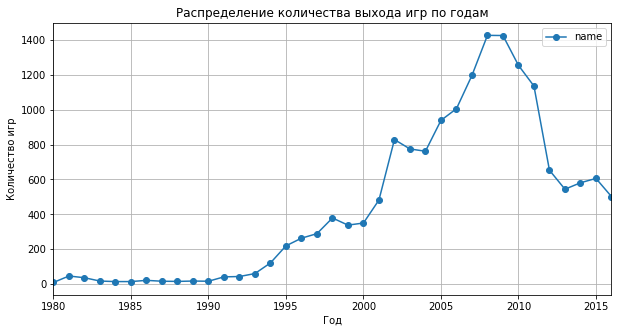

In [25]:
game_year.plot(grid=True, style='o-', xlim=(1980,2016), figsize=(10, 5))
#game_year.plot(grid=True, kind='bar', style='o-', xlim=(1980,2016), figsize=(10, 5))

plt.title('Распределение количества выхода игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()



C 1980-1993 годы выпускалось примерно одинаковое малое кол-во игр, рост пошел с 1993-2008г, в 2009 году количество выпущенных игр было на уровне 2008, затем резкий спад. Можно отбросить данные до 1995 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За  какой характерный срок появляются новые и исчезают старые платформы?

In [26]:
#Построим зависимость количество продаж на разных платформах
sales_platform = data.pivot_table(index=['platform'], values='sum_sales',aggfunc=sum)


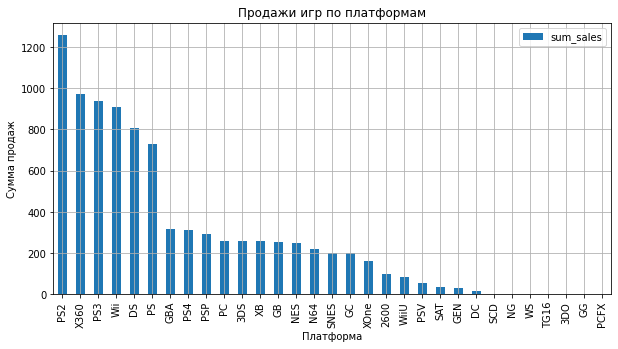

In [27]:
sales_platform.sort_values(by='sum_sales', ascending=False).plot(grid=True, kind='bar', figsize=(10, 5));
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()



Возьмем 6 платформ, выделяющихся на общем фоне, с наибольшими суммарными продажами (PS-730.86
DS-806.12
Wii-907.51
PS3-939.65
X360-971.42
PS2-1255.7) и постром распределение по годам.

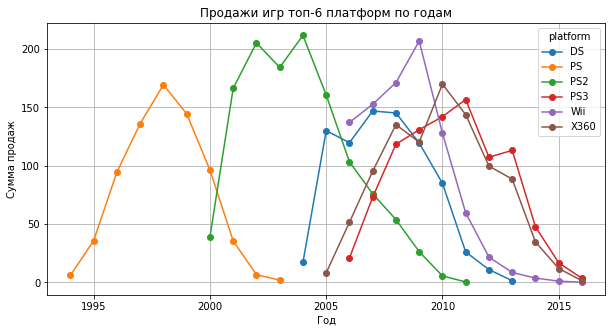

In [28]:
top=['PS','DS', 'Wii', 'PS3', 'X360', 'PS2']

top_platform_year=data.query('platform in @top').pivot_table(index = 'year_of_release',columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, style='o-', xlim=(1993,2017), figsize=(10, 5))
plt.title('Продажи игр топ-6 платформ по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()


In [29]:
top_platform_year=data.query('platform in @top').pivot_table(index = 'year_of_release',columns = 'platform', values='sum_sales', aggfunc='sum')
top_platform_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
0,3.34,3.28,22.21,8.31,16.33,10.18
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN


Вывод: 
За какой характерный срок появляются новые и исчезают старые платформы?
Срок жизни платформы: PS-9 лет,DS-9 лет, Wii-10 лет, PS3-10 лет,X360-11 лет, PS2-11 лет. Средний срок -10 лет.
В среднем пика продаж достигается за 4 года (PS-4 лет,DS-3 лет, Wii-3 лет, PS3-5 лет,X360-5 лет, PS2-4 лет), затем идет спад.
Интересно, что у платформ X360, PS2,DS-по 2 пика.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для прогнозирования продаж на 2017г возьмем данные после 2014 года (последнюю тенденцию по графику "Распределение количества выхода игр по годам"). 

###  Какие платформы лидируют по продажам, растут или падают?  Выберите несколько потенциально прибыльных платформ

лидеры продаж: PS-730.86 DS-806.12 Wii-907.51 PS3-939.65 X360-971.42 PS2-1255.7. Но у всех идет спад продаж. Возьмем топ 10 лидеров продаж и посмотрим в какой фазе роста/падения находятся они. 

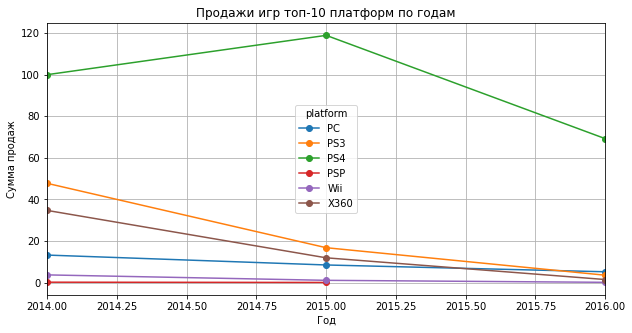

In [30]:
correct_data=data.query('year_of_release>=2014')
top10=['PC','PSP', 'PS4', 'GBA','PS','DS', 'Wii', 'PS3', 'X360', 'PS2']

top_platform_year=correct_data.query('platform in @top10').pivot_table(index = 'year_of_release',columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, style='o-', xlim=(2014,2016), figsize=(10, 5))

plt.title('Продажи игр топ-10 платформ по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()


PS4 находится в активной фазе развития

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

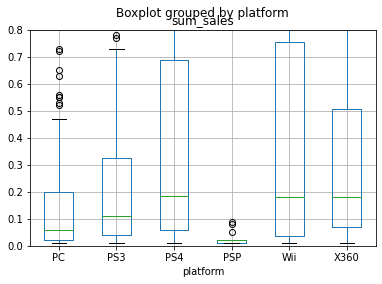

In [31]:
correct_data.query('platform in @top10').boxplot(column='sum_sales', by='platform',)
#plt.show()
plt.ylim(0,0.8);

Лидеры по максимальному значению продаж Wii,PS4,X360, по медианному  PS4, Wii,X360.


### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.  Сформулируйте выводы.

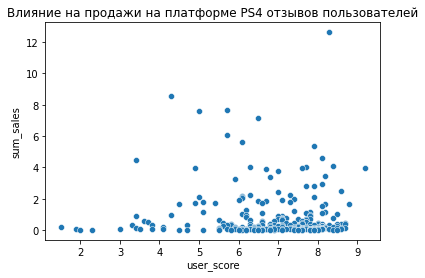

In [32]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
data_ps4=correct_data.query('platform =="PS4"')

import seaborn
x_coordinates = data_ps4['user_score']


y_coordinates = data_ps4['sum_sales']

seaborn.scatterplot(x=x_coordinates, y=y_coordinates);
plt.title('Влияние на продажи на платформе PS4 отзывов пользователей');




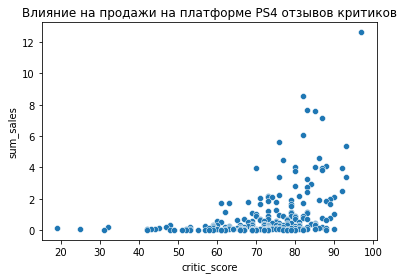

In [33]:
x_coordinates = data_ps4['critic_score']

y_coordinates = data_ps4['sum_sales']

seaborn.scatterplot(x=x_coordinates, y=y_coordinates)
plt.title('Влияние на продажи на платформе PS4 отзывов критиков');

In [34]:
#посчитаем корреляцию
data_ps4['sum_sales'].corr(data_ps4['user_score'])


-0.040131589472697356

In [35]:
data_ps4['sum_sales'].corr(data_ps4['critic_score'])

0.40266141068104083

Продажи внутри одной популярной платформы PS4 не зависят от оценок пользователей, есть небольшая зависимость от оценки критиков.

Посмотрим на зависимость продаж от оценок на других платформах:

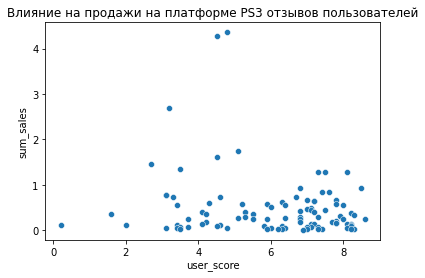

In [36]:
data_ps3=correct_data.query('platform =="PS3"')

x_coordinates = data_ps3['user_score']

y_coordinates = data_ps3['sum_sales']

seaborn.scatterplot(x=x_coordinates, y=y_coordinates);
plt.title('Влияние на продажи на платформе PS3 отзывов пользователей');


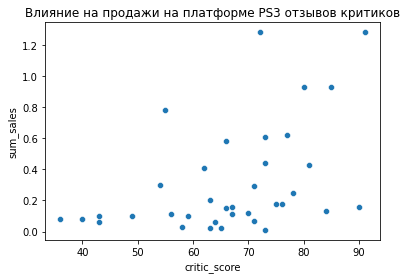

In [37]:
x_coordinates = data_ps3['critic_score']

y_coordinates = data_ps3['sum_sales']

seaborn.scatterplot(x=x_coordinates, y=y_coordinates)
plt.title('Влияние на продажи на платформе PS3 отзывов критиков');

In [38]:
#посчитаем корреляцию
data_ps3['sum_sales'].corr(data_ps3['user_score'])


-0.16676141347662116

In [39]:
data_ps3['sum_sales'].corr(data_ps3['critic_score'])

0.44657460493190704

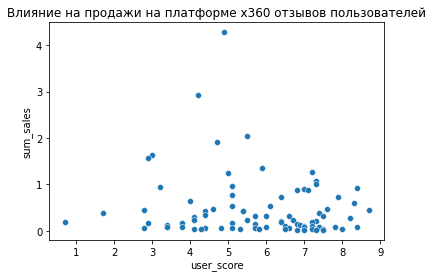

In [40]:
data_x360=correct_data.query('platform =="X360"')

x_coordinates = data_x360['user_score']

y_coordinates = data_x360['sum_sales']

seaborn.scatterplot(x=x_coordinates, y=y_coordinates);
plt.title('Влияние на продажи на платформе x360 отзывов пользователей');


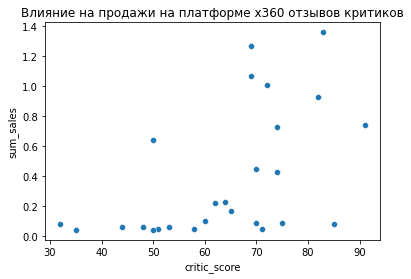

In [41]:
x_coordinates = data_x360['critic_score']

y_coordinates = data_x360['sum_sales']

seaborn.scatterplot(x=x_coordinates, y=y_coordinates)
plt.title('Влияние на продажи на платформе x360 отзывов критиков');

In [42]:
#посчитаем корреляцию
data_x360['sum_sales'].corr(data_x360['user_score'])


-0.138444570945665

In [43]:
data_x360['sum_sales'].corr(data_x360['critic_score'])

0.5257228356581523

### Соотнесите выводы с продажами игр на других платформах.

Продажи внутри других платформы, как и у PS4 не зависят от оценок пользователей, есть небольшая зависимость от оценки критиков.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

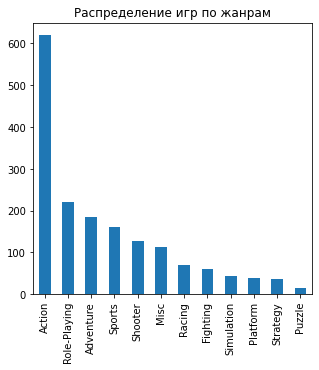

In [44]:
#общее распределение игр по жанрам
#correct_data['genre'].value_counts().plot(kind='pie', figsize=(5, 5),autopct='%.0f%%',explode=explode)
#explode = (0.05, 0.05, 0.05, 0.05,0.05,0.05 ,0.05 ,0.05 ,0.05 ,0.05)
correct_data['genre'].value_counts().plot(kind='bar', figsize=(5, 5))
plt.title('Распределение игр по жанрам');

In [45]:
correct_data['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Лидирует Action (37%),на втором месте Role-Playing(13%),на третьем-Adventure(11%).


In [46]:
#Посмотрим самые прибыльные жанры
sale_genre = correct_data.pivot_table(index='genre', values='sum_sales', aggfunc='sum')
sale_genre.sort_values('sum_sales', ascending=False)


,sum_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


По продажам лидируют Action, Shooter, Sports, самые маленькие продажи у жанра Puzzle.

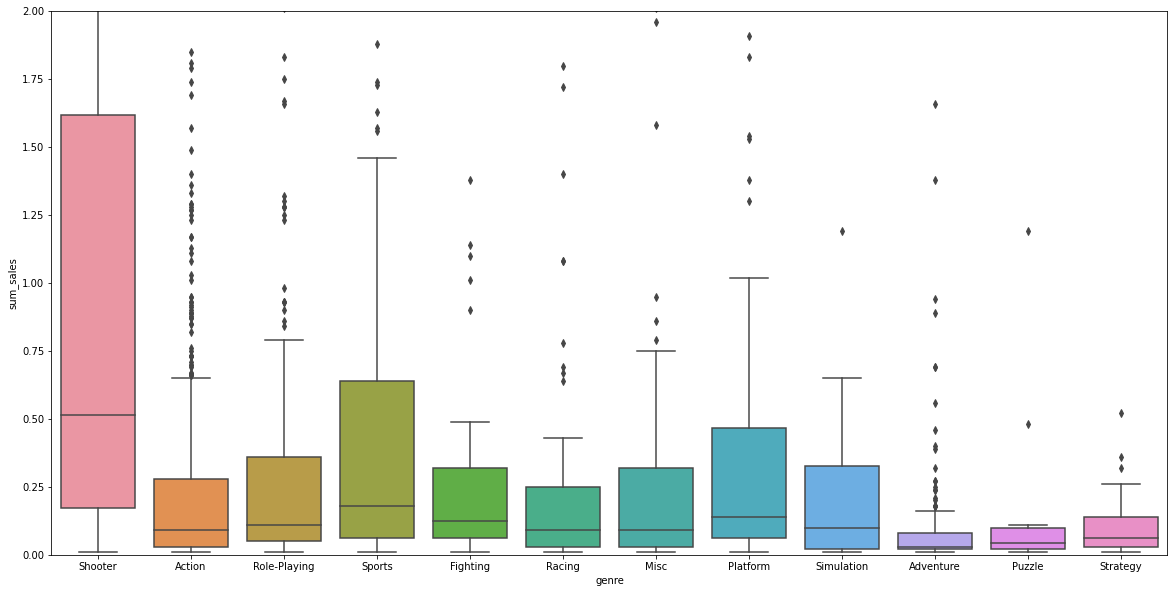

In [66]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='genre', y='sum_sales', data=correct_data)
plt.ylim(0,2);



Лидирует Shooter по максимальным и средним продажам.

## Составьте портрет пользователя каждого региона

### Составьте портрет пользователя каждого региона Определите для пользователя каждого региона (NA, EU, JP)

#Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

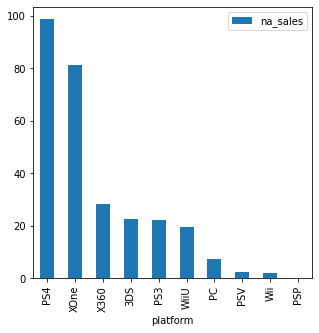

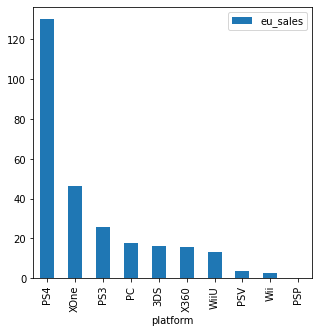

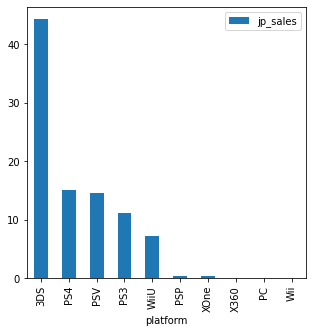

In [48]:

sales_region = correct_data.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
#explode = (0.05, 0.05, 0.05, 0.05,0.05,0.05 ,0.05 ,0.05 ,0.05 ,0.05)
#sales_region.plot(y='na_sales',kind='pie',figsize=(5, 5),autopct='%.0f%%',explode=explode)
#sales_region.plot(y='jp_sales',kind='pie',figsize=(5, 5),autopct='%.0f%%',explode=explode)
#sales_region.plot(y='eu_sales',kind='pie',figsize=(5, 5),autopct='%.0f%%',explode=explode);

sales_region.sort_values('na_sales', ascending=False).plot(y='na_sales',kind='bar',figsize=(5, 5))
sales_region.sort_values('eu_sales', ascending=False).plot(y='eu_sales',kind='bar',figsize=(5, 5))
sales_region.sort_values('jp_sales', ascending=False).plot(y='jp_sales',kind='bar',figsize=(5, 5));


In [49]:
#топ-5 платформ для разных регионов:
top_na=['PS4','XOne', 'X360', '3DS', 'PS3']
top_jp=['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']
top_eu=['PS4', 'XOne', 'PS3', 'PC', '3DS']


В Америке лидирует платформа PS4, в Японии -3DS, в Европе-PS4.


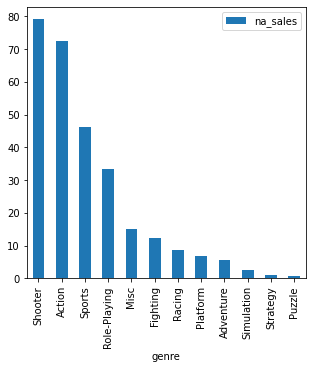

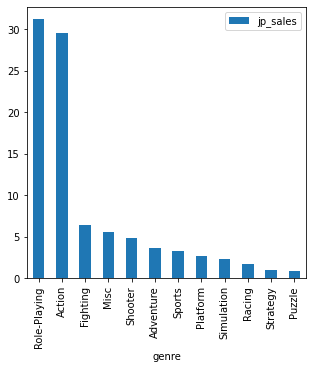

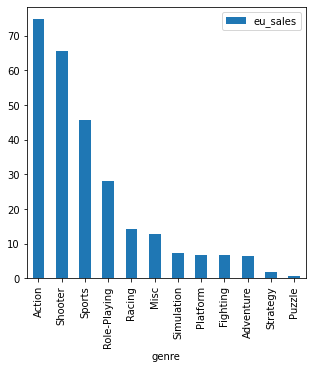

In [50]:
# распределение игр по жанрам в регионах
genre_region = correct_data.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
#genre_region.plot(y='na_sales',kind='pie',figsize=(8, 8),autopct='%.0f%%')
#genre_region.plot(y='jp_sales',kind='pie',figsize=(8, 8),autopct='%.0f%%')
#genre_region.plot(y='eu_sales',kind='pie',figsize=(8, 8),autopct='%.0f%%');

genre_region.sort_values('na_sales', ascending=False).plot(y='na_sales',kind='bar',figsize=(5, 5))
genre_region.sort_values('jp_sales', ascending=False).plot(y='jp_sales',kind='bar',figsize=(5, 5))
genre_region.sort_values('eu_sales', ascending=False).plot(y='eu_sales',kind='bar',figsize=(5, 5));

In [51]:
#топ-5 жанров для разных регионов:
top_na=['Shooter','Action','Sports', 'Role-Playing''Misc']
top_jp=['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']
top_eu=['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']


В Америке лидирует 'Shooter', в Европе лидирует Action, в Японии- Role-Playing.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
«EC» («Early childhood») — «Для детей младшего возраста»
«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
«AO» («Adults Only 18+») — «Только для взрослых»
«RP» («Rating Pending») — «Рейтинг ожидается»
«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

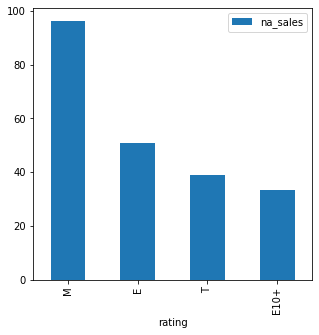

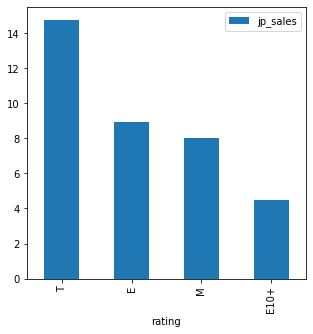

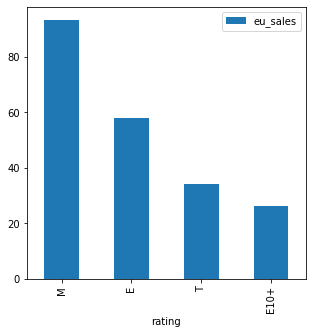

In [52]:
#рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе

genre_region = correct_data.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
#genre_region.plot(y='na_sales',kind='pie',figsize=(5, 5),autopct='%.0f%%')
#genre_region.plot(y='jp_sales',kind='pie',figsize=(5, 5),autopct='%.0f%%')
#genre_region.plot(y='eu_sales',kind='pie',figsize=(5, 5),autopct='%.0f%%');

genre_region.sort_values('na_sales', ascending=False).plot(y='na_sales',kind='bar',figsize=(5, 5))
genre_region.sort_values('jp_sales', ascending=False).plot(y='jp_sales',kind='bar',figsize=(5, 5))
genre_region.sort_values('eu_sales', ascending=False).plot(y='eu_sales',kind='bar',figsize=(5, 5));

Лидируют:
В Америке: «M» («Mature») — «Для взрослых».
В Японии: «T» («Teen») — «Подросткам».
В Европе: «M» («Mature») — «Для взрослых».

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action и Sports разные.


Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


уровень статистической значимости 5% 
𝐻0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.(всегда формулируется со знаком=)

𝐻1— средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [53]:
xbox_one=correct_data.query('(platform == "XOne")&(user_score > 0)')['user_score']
pc=correct_data.query('(platform == "PC")&(user_score > 0)')['user_score']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости


results = st.ttest_ind(xbox_one, pc,equal_var = False)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 




p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [54]:
#проверка
print(xbox_one.mean())
print(pc.mean())

6.594545454545456
6.298360655737705


𝐻0 — средние пользовательские рейтинги жанров Action и Sports одинаковые.(всегда формулируется со знаком=)

𝐻1— средние пользовательские рейтинги жанров Action и Sports разные.

In [55]:
#проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные
action=correct_data.query('(genre == "Action")&(user_score > 0)')['user_score']
sports=correct_data.query('(genre == "Sports")&(user_score > 0)')['user_score']

alpha = 0.05 # ваш код: задайте критический уровень статистической значимости


results = st.ttest_ind(action, sports,equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [56]:
print(action.mean())
print(sports.mean())

6.760606060606061
5.2251968503937


### Поясните гипотезы. Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.

уровень статистической значимости 5%
первая гипотеза:
𝐻0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.(всегда формулируется со знаком=)

𝐻1— средние пользовательские рейтинги платформ Xbox One и PC различаются.


вторая гипотеза:
𝐻0 — средние пользовательские рейтинги жанров Action и Sports одинаковые.(всегда формулируется со знаком=)

𝐻1— средние пользовательские рейтинги жанров Action и Sports разные.

Вывод: средний рейтинг платформ Xbox One и PC  не отличается.Средние пользовательские рейтинги жанров Action и Sports разные.

## Напишите общий вывод

ВЫВОД:
     Целью исследования было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
     Входные данные: Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)(данные до 2016 года).  

    В ходе исследования было сделано:
     1. Подготовка данных.
    1.1 Заменены названия столбцов (приведены к нижнему регистру);
    1.2 Преобразованы данные в нужные типы. 
    1.3 Обработаны пропуски.
    1.4 Посчитаны суммарные продажи во всех регионах.
     2. Проведен исследовательский анализ данных
    2.1 Выбраны данные за определенный актуальный период.
    2.2 Выбраны платформы с наибольшими суммарными продажами и построено распределение по годам.
    2.3 Определено за какой характерный срок появляются новые и исчезают старые платформы.
    2.4 Выбраны несколько потенциально прибыльных платформ.
    2.5 Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
    2.6 Рассмотрено влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
        Построена диаграмма рассеяния и посчитана корреляция между отзывами и продажами. 
    2.6 Рассмотрено общее распределение игр по жанрам.

     3. Составлен портрет пользователя каждого региона
    3.1 Определено для пользователя каждого региона (NA, EU, JP):
        Самые популярные платформы (топ-5). 
        Самые популярные жанры (топ-5). 
    3.2 Рассмотрено влияет ли рейтинг ESRB на продажи в отдельном регионе.
     4. Проверены гипотезы
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Результаты выявили следующие закономерности,определяющие успешность игры:
Продажи внутри других платформы, как и у PS4 не зависят от оценок пользователей, есть небольшая зависимость от оценки критиков.
Общее распределение игр по жанрам: Action (37%), Role-Playing(13%),на третьем-Adventure(11%).
По общим продажам лидируют Action, Shooter, Sports, самые маленькие продажи у жанра Puzzle.
По максимальным и средним продажам лидирует Shooter.
Популярные платформы в разных регионах: в Америке  PS4, в Японии -3DS, в Европе-PS4.

топ 5 платформ в разных регионах
top_na=['PS4','XOne', 'X360', '3DS', 'PS3']
top_jp=['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']
top_eu=['PS4', 'XOne', 'PS3', 'PC', '3DS']

топ-5 жанров для разных регионов:
top_na=['Shooter','Action','Sports', 'Role-Playing''Misc']
top_jp=['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']
top_eu=['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
В Америке лидирует 'Shooter', в Европе лидирует Action, в Японии- Role-Playing.
По рейтингу ESRB лидируют:в Америке: «M» («Mature») — «Для взрослых». В Японии: «T» («Teen») — «Подросткам». В Европе: «M» («Mature») — «Для взрослых».
